# 단어 표현

자연어 처리는 컴퓨터가 인간의 언어를 이해하고 분석 가능한 모든 분야를 말한다. 컴퓨터는 텍스트뿐만 아니라 모든 값을 읽을 때 이진화된 값으로 받아들인다. 즉 0과 1로만 구성된 값으로 인식하는데, 텍스트는 그 중 "유니코드"라는 방법 혹은 영어의 경우에는 "아스키 코드"라는 방식을 통해 인식할 수 있다.

예를들어 "언어"라는 텍스트를 유니코드 방식으로 컴퓨터가 인식한다면 다음과 같은 형태로 입력된다.

 - 언 : 1100010110111000
 - 어 : 1100010110110100
 
두 글자를 위와 같이 이진화된 값으로 인식하는데, 자연어 처리에 이 방식을 그대로 사용하기에는 문제가 있다. 문자를 이진화한 값의 경우 언어적인 특성이 전혀 없이 단순히 컴퓨터가 인식하기 위해 만들어진 값이므로 자연어 처리를 위해 만드는 모델에 적용하기에는 부적합하다.

이를 해결하는 방법이 "단어 표현(Word Representation)"분야이다. 텍스트를 자연어 처리를 위한 모델에 적용할 수 있게 언어적인 특성을 반영해서 단어를 수치화하는 방법을 찾는 것이다. 단어를 수치화할 때 주로 벡터를 표현한다.

따라서 단어 표현은 "단어 임베딩(word embedding)" 또는 "단어 벡터(word vector)"로 표현하기도 한다. 단어 표현은 다양한 방법이 있고 계속해서 연구되는 분야이기 때문에 하나의 정답이 있는 것이 아닌 여러 방법들이 존재한다.

# One Hot Encoding

단어를 표현하는 가장 기본적인 방법은 원-핫 인코딩이다. 단어를 하나의 벡터로 표현하는 방법인데, 각 값은 0 또는 1의 값만 갖는다. 즉, 각 단어는 0과 1 값만 가지는 벡터로 표현되는데, 이름에서 알 수 있는 벡터 값 가운데 하나만 1이라는 값을 가지고 나머지는 모두 0 값을 갖는 방식이다. 여기서 1이 되는 것은 각 단어가 어떤 단어인지를 알려주는 인덱스 역할을 한다.

이 방법은 방법 자체가 매우 간단하고 이해하기도 쉽다는 장점이 있다. 하지만 결정적인 두 가지 문제점이 있다. 단어의 개수 자체가 적으면 문제가 안되지만, 실제로 자연어 처리 문제를 해결할 때는 수십만, 수백만 개가 넘는 단어를 표현해야 한다. 이 경우 각 단어 벡터의 크기가 너무 커지기 때문에 공간을 많이 사용하고, 큰 공간에 비해 실제 사용하는 값은 1이 되는 값 하나이므로 매우 공간이 비효율적이다. 또한 이런 표현 방식은 단순히 단어가 뭔지만 알려줄 수 있고, 벡터값 자체에는 단어의 의미나 특성 같은 것들이 전혀 표현되지 않는다는 것이다.

# 분포 가설 기반의 단어 표현

OneHotEncoding의 이런 문제점들을 해결하기 위해 개발된 방법이 분포 가설(Distributed Hypothesis)을 기반으로 한 방법이다. 분포 가설이란 "같은 문맥의 단어, 즉 비슷한 위치에 나오는 단어는 비슷한 의미를 가진다"라는 개념이다. 따라서 어떤 글에서 비슷한 위치에 존재하는 단어는 단어 간의 유사도가 높다고 판단하는 방법인데, 크게 두 가지 방법으로 나눈다.

특정 문맥 안에서 단어들이 동시에 등장하는 횟수를 직접 세는 방법인 카운트 기반(count-base) 방법과 신경망 등을 통해 문맥 안의 단어들을 예측하는 방법인 예측(predict) 방법으로 나눈다.

# 카운트 기반 방법

카운트 기반 방법으로 단어를 표현한다는 것은 어떤 글의 문맥 안에 단어가 동시에 등장하는 횟수를 세는 방법이다. 여기서 동시에 등장하는 횟수를 동시 출현 혹은 공기라고 부르고 영어로는 Co-occurrence라고 한다. 카운트 기반 방법에서는 기본적으로 동시 등장 횟수를 하나의 행렬로 나타낸 뒤 그 행렬을 수치화해서 단어 벡터로 만드는 방법을 사용하는 방식이다.

#### 방법 종류
 - 특이값 분해 (Singular Value Decomposition, SVD)
 - 잠재의미분석 (Latent Semantic Analysis, LCA)
 - Hyperspace Analogue to Language (HAL)
 - Hellinger PCA (Principal Component Analysis)
 
위의 방법들은 모두 동시 출현 행렬(Co-occurrence Matrix)을 만들고 그 행렬들을 변형하는 방식이다. 이 행렬들을 통해 다시 단어 벡터로 만들기도 한다.

# Co-occurence Matrix

In [1]:
import numpy as np
import nltk
from nltk import bigrams
import itertools
import pandas as pd
 
 
def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    # return the matrix and the index
    return co_occurrence_matrix, vocab_index
 
 
text_data = [['성진과', '창욱은', '야구장에', '갔다'],
             ['성진과', '태균은', '도서관에' '갔다'],
             ['성진과', '창욱은', '공부를', '좋아한다']]
 
# Create one list using many lists
data = list(itertools.chain.from_iterable(text_data))
matrix, vocab_index = generate_co_occurrence_matrix(data)
 
 
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)
print(data_matrix)

        태균은  야구장에  좋아한다  도서관에갔다  창욱은   갔다  공부를  성진과
태균은     0.0   0.0   0.0     0.0  0.0  0.0  0.0  1.0
야구장에    0.0   0.0   0.0     0.0  1.0  0.0  0.0  0.0
좋아한다    0.0   0.0   0.0     0.0  0.0  0.0  1.0  0.0
도서관에갔다  1.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0
창욱은     0.0   0.0   0.0     0.0  0.0  0.0  0.0  2.0
갔다      0.0   1.0   0.0     0.0  0.0  0.0  0.0  0.0
공부를     0.0   0.0   0.0     0.0  1.0  0.0  0.0  0.0
성진과     0.0   0.0   0.0     1.0  0.0  1.0  0.0  0.0


이러한 카운트 기반 방법의 장점은 우선 빠르다는 것이다. 여기서 말하는 "빠르다"라는 것은 우리가 만들어야 할 단어 벡터가 많아질수록 사용하는 방법에 따라 시간이 많이 소요되는데, 이런 방식의 장점은 적은 시간으로 단어 벡터를 만들 수 있다는 것이다.

# 예측 방법

예측 기반 방법이란 신경만 구조 혹은 어떠한 모델을 사용해서 특정 문맥에서 어떤 단어가 나올지를 예측하면서 단어로 벡터로 만드는 방식이다.

#### 방법 종류
 - Word2vec
 - NNLM (Neural Network Language Model)
 - RNNLM (Recurrent Neural Network Language Model)
 
Word2vec는 가장 많이 사용되는 단어 표현 방법이다. 이 방법은 CBOW(Contiuous Bag of Words)와 Skip-Gram이라는 두가지 모델로 나뉜다. 두 모델은 각각 서로 반대되는 개념인데, CBOW의 경우 어떤 단어를 문맥 안의 주변 단어들을 통해 예측하는 방법이다. 반대로 Skip-Gram의 경우 어떤 단어를 가지고 특정 문맥 안의 주변 단어들을 예측하는 방법이다.

창욱은 냉장고에서 음식을 꺼내서 먹었다.

 - COBW : 창욱은 냉장고에서 ___ 꺼내서 먹었다.
 - Skip-Gram : ___ _____ 음식을 ___ ___

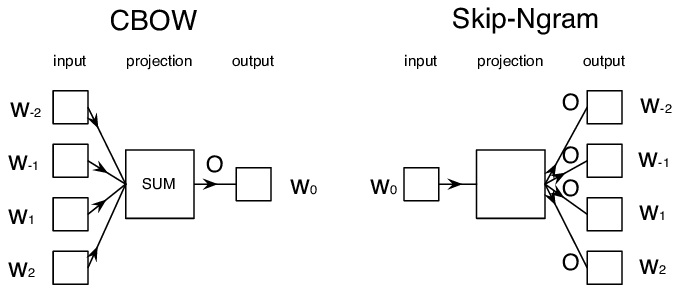

In [2]:
from IPython.display import Image
Image("Image/111.png")

# CBOW (Continuous Bag of Words)

1. 각 주변 단어들을 OneHotVector로 만들어 입력값으로 사용한다. (입력층 벡터)
2. 가중치 행렬(Weight Matrix)을 각 OneHotVector에 곱해서 n-차원 벡터를 만든다. (N-차원 은닉층)
3. 만들어진 n-차원 벡터를 모두 더한 후 개수로 나눠 평균 n-차원 벡터를 만든다. (출력층 벡터)
4. n-차원 벡터에 다시 가중치 행렬을 곱해서 OneHotVector와 같은 차원의 벡터로 만든다.
5. 만들어진 벡터를 실제 예측하려고 하는 단어의 OneHotVector와 비교해서 학습한다.

# Skip-Gram

1. 하나의 단어를 OneHotVector로 만들어서 입력값으로 사용한다. (입력층 벡터)
2. 가중치 행렬(Weight Matrix)을 각 OneHotVector에 곱해서 n-차원 벡터를 만든다. (N-차원 은닉층)
3. n-차원 벡터에 다시 가중치 행렬을 곱해서 OneHotVector와 같은 차원의 벡터로 만든다. (출력층 벡터)
4. 만들어진 벡터를 실제 예측하려고 하는 주변 단어들 각각의 OneHotVector와 비교해서 학습한다.

이 두 모델의 학습 과정이 비슷해 보이지만 확실한 차이점이 있다. CBOW는 입력값으로 여러개의 단어를 사용하고 학습을 위해 하나의 단어와 비교한다. Skip-Gram은 입력값이 하나의 단어이고, 학습을 위해 여러 단어와 비교한다.

학습 과정을 모두 끝낸 후 가중치 행렬의 각 행을 단어 벡터로 사용한다. 이렇게 만든 Word2vec의 두 모델은 여러 가지 장점이 있다. 카운트 기반 방법의 단어 벡터보다 단어 간의 유사도를 더 잘 측정한다. 또 단어들의 복잡한 특징까지도 잘 잡아낸다. 또한 이렇게 만들어진 단어 벡터는 서로에게 유의미한 관계를 측정할 수 있다.

예를 들면 cat, pet, data, machine, study, colleague 라는 단어들을 word2vec 모델을 적용하여 단어 벡터를 만들면 아래와 같다.

# 벡터 오프셋 관계도

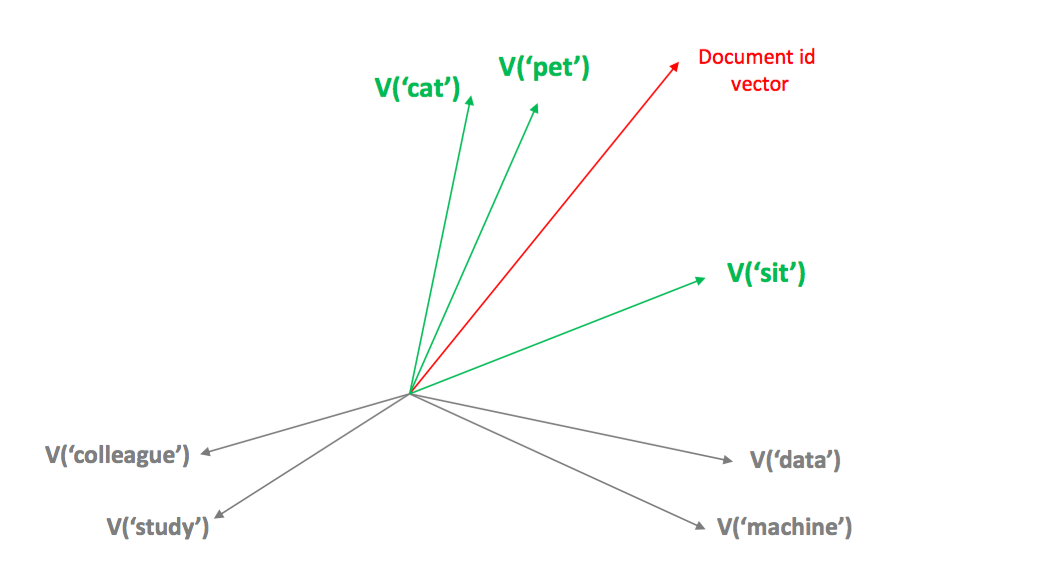

In [3]:
from IPython.display import Image
Image("Image/222.png")

CBOW와 Skip-Gram 모델 중에서는 일반적으로 Skip-Gram이 성능이 좋아 더 많이 사용하지만, 절대적으로 항상 좋은 것은 아니기 때문에 두 모델 모두 시도해보는 노력이 필요하다.